### <font color='#00d2d3'> Importer les packages

In [1]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords') # Télécharger le package stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords # Importer le package stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### <font color='#00d2d3'> Importer et lire les données

In [2]:
# Importer les données
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Afficher les données
data=pd.read_csv('/content/drive/MyDrive/Future_Intern/reddit_data.csv')
df= pd.read_csv('/content/drive/MyDrive/Memoire/reddit_good.csv')

- 1 : Negative
- 0 : Positive

In [4]:
# Dimension des données
df.shape

(5600, 5)

### <font color='#00d2d3'> Pré-traitement des données

In [5]:
print(data['selftext'].apply(type).value_counts())
print(df['title'].apply(type).value_counts())

selftext
<class 'str'>      12375
<class 'float'>      872
Name: count, dtype: int64
title
<class 'str'>    5600
Name: count, dtype: int64


#### <font color='#00d2d3'> Pré-traitement des données textuelles

In [6]:
# Afficher la première ligne de la colonne text
df['title'][0]

'Spent the past 19 years of my life in the military. Happy to say that in one more year I will be retired. 🙌🏾🙌🏾'

In [7]:
# Afficher la deuxième ligne de la colonne text
data['selftext'][0]

'\nMe (28f) nd my boyfriend (34m) have been in a relationship for 2 years. We got into an argument last night. It started over this girl he used to work with as I’d seen he had liked one of her photos and I asked if they still talked. He said no look at my phone if you want. So I called his bluff and I was like fine I will. When I went to check their chat was empty and I know they had previously messaged. I asked him why he deleted the chat and he said he did it ages ago to stop our arguments. He tried to grab his phone back but I was clinging onto it and kept saying but why are they deleted. He eventually tackled the phone off of me and left a mark on my arm and broke 2 of my nails. Is this domestic abuse? I have a very dark feeling that my partner just hit me but he insists it was just because we tackled for the phone and I wouldn’t let go and that he hadn’t “hit or abused me”. I’m very confused and upset, the deleted messages are a separate issue to this. I’d like clarification on t

###### <font color='#1dd1a1'> Commencer le nettoyage des tweets


In [8]:
# Fonction supprimant les links
def remove_links(title):
    title= re.sub(r'http:?//\S+ | https:?//\S+','',title)
    return title

In [9]:
# Fonction supprimant les @username
def remove_users(title):
    title = re.sub(r'@[\w\-._]+','',title)
    return title

In [10]:
# Supprimer les adresses emails
def email_address(text):
  title= re.sub(r'@[\w\-._]+','',text)
  return title

In [11]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.9 MB/s eta 0:00:00


In [12]:
import contractions
# Fonction étendant les contractions
def contraction(title):
    expanded_all = []
    for word in title.split():
        expanded_all.append(contractions.fix(word)) # utiliser la fonction fix de contractions

    expand = ' '.join(expanded_all)
    return expand

In [13]:
# Supprimer html caractères
def clean_html(text):
   title = re.sub(r'&\w+','',text)
   return title

In [14]:
# Remplacer tout ce qui n'est chaines de caractères alphabétiques et espace par ' '
def alpha_b(text):
   title = re.sub(r'^a-zA-Z\s]+',' ',text)
   return title

In [15]:
def crochet(text):
   title= re.sub(r'\[.*?\]', '', text)
   return title

In [16]:
# Fonction remplaçant les espaces multiples et convertissant majuscules en minuscules
def lower(text):
    title = re.sub(r'\s(2,)',' ' ,text)
    return title

In [17]:
# Supprimer les espaces en début et fin de tweet
def clean_space(text):
    title = re.sub(r'^\s|\s$',' ' ,text)
    return title

In [18]:
# Fonction supprimant les stopwords
def remove_stopwords(text):
    Stopwords = stopwords.words('english')
    title= ' '.join([word for word in text.split() if word not in Stopwords])
    return title

In [19]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def lem_sw(text):
    title = [lemma.lemmatize(word) for word in text.split()]
    title = " ".join(title)
    return title

###### <font color='#1dd1a1'> Appliquer les différentes fonctions sur letitle



In [20]:
# Appliquer la fonction remove_users
data['new_title'] = data.title.apply(func =remove_users)
# Appliquer la fonction remove_links
data['new_title'] = data.new_title.apply(func =remove_links)
# Appliquer la fonction email_address
data['new_title'] = data.new_title.apply(func =email_address)
# Appliquer la fonction remove_contraction
data['new_title'] = data.new_title.apply(func = contraction)
# Appliquer la fonction clean_html
data['new_title'] = data.new_title.apply(func =clean_html)
# Appliquer la fonction alpha_b
data['new_title'] = data.new_title.apply(func =alpha_b)
# Appliquer la fonction crochet
data['new_title'] = data.new_title.apply(func =crochet)
# Appliquer la fonction lower
data['new_title'] = data.new_title.apply(func =lower)
# Appliquer la fonction clean_space
data['new_title'] = data.new_title.apply(func =clean_space)
# Appliquer la fonction remove_stopwords
data['new_title'] = data.new_title.apply(func =remove_stopwords)
# Appliquer la fonction lem_sw
data['new_title'] = data.new_title.apply(func =lem_sw)

In [21]:
# Appliquer la fonction remove_users
df['new_title'] = df.title.apply(func =remove_users)
# Appliquer la fonction remove_links
df['new_title'] = df.new_title.apply(func =remove_links)
# Appliquer la fonction email_address
df['new_title'] = df.new_title.apply(func =email_address)
# Appliquer la fonction remove_contraction
df['new_title'] = df.new_title.apply(func = contraction)
# Appliquer la fonction clean_html
df['new_title'] = df.new_title.apply(func =clean_html)
# Appliquer la fonction alpha_b
df['new_title'] = df.new_title.apply(func =alpha_b)
# Appliquer la fonction crochet
df['new_title'] = df.new_title.apply(func =crochet)
# Appliquer la fonction lower
df['new_title'] = df.new_title.apply(func =lower)
# Appliquer la fonction clean_space
df['new_title'] = df.new_title.apply(func =clean_space)
# Appliquer la fonction remove_stopwords
df['new_title'] = df.new_title.apply(func =remove_stopwords)
# Appliquer la fonction lem_sw
df['new_title'] = df.new_title.apply(func =lem_sw)

In [22]:
# Afficher la ligne d'index 0
df['new_title'][1200]

'No Politics!'

In [23]:
df.isnull().sum()

,0
title,0
selftext,1016
created_utc,0
author,48
subreddit,0
new_title,0


In [24]:
df

,title,selftext,created_utc,author,subreddit,new_title
0,Spent the past 19 years of my life in the mili...,NaN,1.734963e+09,Savings_Response_173,happy,Spent past 19 year life military. Happy say on...
1,I baked some apple pies to gift to friends for...,NaN,1.734982e+09,AmbitiousQuirk,happy,I baked apple pie gift friend Christmas.
2,all this food donated to me by the local churc...,"much more extensive than previous years, they ...",1.734950e+09,Open_Ad_1201,happy,food donated local church spirit Christmas
3,"Ik its not a crazy physique, but considering I...",NaN,1.734989e+09,That-Range-8045,happy,"Ik crazy physique, considering I pectus excava..."
4,Was told my credit score went up. So happy I w...,NaN,1.734967e+09,Alchemist_Joshua,happy,Was told credit score went up. So happy I able...
...,...,...,...,...,...,...
5595,What movies had an impact on you?,Something i love about movies is how inspiring...,1.734850e+09,Marvelous_mm88,CasualConversation,What movie impact you?
5596,Reddit is truly a wonderful place!,"For a bit of context, I’m autistic. The other ...",1.734822e+09,TheGirlWithTheLove,CasualConversation,Reddit truly wonderful place!
5597,Fast food,I have given up Chinese takeout like 4 nights ...,1.734897e+09,Lukexxxxy,CasualConversation,Fast food
5598,Does anyone else feel personally attacked when...,"Lol there’s nothing worse than lying in bed, m...",1.734810e+09,soobiepookie19,CasualConversation,Does anyone else feel personally attacked phon...


In [25]:
columns_to_drop = ['title', 'selftext', 'created_utc', 'author', 'subreddit']
# Garder uniquement les colonnes existantes dans le DataFrame
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

data = data.drop(columns=columns_to_drop)
data

,new_title
0,Is considered domestic violence?
1,My family expects (30F) leave family (and smal...
2,My boyfriend got arrested domestic violence ch...
3,"Me BF 3 years, parent want see bank statements."
4,Last night (25F) boyfriend 6 month (30M) told ...
...,...
13242,What worst relationship advice ever seen given...
13243,Do believe love important thing relationship?
13244,Why many woman love story Twilight 50 shade gr...
13245,What small thing silently judge prospective ro...


In [26]:
columns_to_drop = ['title', 'selftext', 'created_utc', 'author', 'subreddit']
# Garder uniquement les colonnes existantes dans le DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop)
df

,new_title
0,Spent past 19 year life military. Happy say on...
1,I baked apple pie gift friend Christmas.
2,food donated local church spirit Christmas
3,"Ik crazy physique, considering I pectus excava..."
4,Was told credit score went up. So happy I able...
...,...
5595,What movie impact you?
5596,Reddit truly wonderful place!
5597,Fast food
5598,Does anyone else feel personally attacked phon...


In [27]:
data["label"] = 1  # 1 pour violent
df["label"] = 0  # 0 pour non violent
combined_df = pd.concat([data, df], ignore_index=True)

combined_df

,new_title,label
0,Is considered domestic violence?,1
1,My family expects (30F) leave family (and smal...,1
2,My boyfriend got arrested domestic violence ch...,1
3,"Me BF 3 years, parent want see bank statements.",1
4,Last night (25F) boyfriend 6 month (30M) told ...,1
...,...,...
18842,What movie impact you?,0
18843,Reddit truly wonderful place!,0
18844,Fast food,0
18845,Does anyone else feel personally attacked phon...,0


In [28]:
combined_df["label"].value_counts()

,count
label,
1,13247
0,5600


In [29]:
from sklearn.utils import resample

# Texte violent (classe minoritaire)
violent = combined_df[combined_df["label"] == 1]

# Texte non violent (classe majoritaire)
non_violent = combined_df[combined_df["label"] == 0]

# Sur-échantillonnage pour équilibrer
non_violent_upsampled = resample(non_violent,
                              replace=True,  # Permet de dupliquer les données existantes
                              n_samples=len(violent),  # Nombre d'échantillons à égaler à la classe majoritaire
                              random_state=42)

# Combiner les deux classes
balanced_df = pd.concat([ violent, non_violent_upsampled])

# Vérifier la répartition des classes
print(balanced_df["label"].value_counts())



label
1    13247
0    13247
Name: count, dtype: int64


In [30]:
balanced_df=combined_df.dropna()

In [31]:
balanced_df.shape

(18847, 2)

### <font color='#00d2d3'> Vectorisation

In [32]:
# Importer train_test_split
from sklearn.model_selection import train_test_split

X = balanced_df["new_title"]  # Caractéristiques (textes)
y = balanced_df["label"]  # Labels (0 ou 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille des données d'entraînement : {len(X_train)}")
print(f"Taille des données de test : {len(X_test)}")

Taille des données d'entraînement : 15077
Taille des données de test : 3770


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Ajuste max_features si besoin

# Transformer les données
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

print(f"Taille des vecteurs TF-IDF (entraînement) : {X_train_vec.shape}")
print(f"Taille des vecteurs TF-IDF (test) : {X_test_vec.shape}")

Taille des vecteurs TF-IDF (entraînement) : (15077, 5000)
Taille des vecteurs TF-IDF (test) : (3770, 5000)


In [34]:
from sklearn.feature_selection import chi2
import numpy as np

# Appliquer le test du Chi-2
chi2_scores, p_values = chi2(X_train_vec, y_train)

# Associer les scores aux termes
features = vectorizer.get_feature_names_out()
chi2_results = pd.DataFrame({
    "Feature": features,
    "Chi2_Score": chi2_scores,
    "P_Value": p_values
})

# Trier par pertinence
chi2_results = chi2_results.sort_values(by="Chi2_Score", ascending=False)

# Afficher les termes les plus pertinents
print("Les termes les plus pertinents selon le Chi-2 :")
print(chi2_results.head(10))

Les termes les plus pertinents selon le Chi-2 :
          Feature  Chi2_Score       P_Value
895     christmas  126.537442  2.345348e-29
212       abusive  114.726516  9.033487e-27
207         abuse   91.862143  9.292992e-22
1393     domestic   65.265534  6.545617e-16
4805     violence   61.995335  3.442720e-15
4379     survivor   61.639426  4.124764e-15
208        abused   60.522421  7.274516e-15
4410         talk   56.244027  6.401201e-14
4573        toxic   53.775828  2.247205e-13
1519  emotionally   51.405789  7.511670e-13


In [35]:
# Filtrer les termes pertinents
relevant_features = chi2_results[chi2_results["P_Value"] < 0.05]

print(f"Nombre de termes pertinents sélectionnés : {len(relevant_features)}")
print(relevant_features.head())

Nombre de termes pertinents sélectionnés : 1228
        Feature  Chi2_Score       P_Value
895   christmas  126.537442  2.345348e-29
212     abusive  114.726516  9.033487e-27
207       abuse   91.862143  9.292992e-22
1393   domestic   65.265534  6.545617e-16
4805   violence   61.995335  3.442720e-15


In [36]:
# Créer un nouveau vecteur TF-IDF avec les termes pertinents
selected_features = relevant_features["Feature"].tolist()

# Reconstruire le vectoriseur avec les termes sélectionnés
vectorizer_selected = TfidfVectorizer(vocabulary=selected_features)

# Transformer les données d'entraînement et de test avec les termes sélectionnés
X_train_selected = vectorizer_selected.fit_transform(X_train)
X_test_selected = vectorizer_selected.transform(X_test)

print(f"Taille de la nouvelle matrice d'entraînement : {X_train_selected.shape}")
print(f"Taille de la nouvelle matrice de test : {X_test_selected.shape}")

Taille de la nouvelle matrice d'entraînement : (15077, 1228)
Taille de la nouvelle matrice de test : (3770, 1228)


In [37]:
# # Sauvegarder le vectoriseur
# import joblib
# joblib.dump(vectorizer_selected, "vectorizer_selected.pkl")  # Si tu utilises le test Chi-2
# joblib.dump(model_lr, "logistic_regression_model.pkl")


#LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle
model_lr = LogisticRegression(random_state=42)

# Entraîner le modèle
model_lr.fit(X_train_selected, y_train)

print("Modèle entraîné avec succès !")

Modèle entraîné avec succès !


In [39]:
from sklearn.metrics import classification_report, accuracy_score

# Faire des prédictions
y_pred = model_lr.predict(X_test_selected)

# Afficher les métriques
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1107
           1       0.92      0.95      0.94      2663

    accuracy                           0.91      3770
   macro avg       0.90      0.88      0.89      3770
weighted avg       0.91      0.91      0.91      3770

Précision du modèle : 0.91


In [40]:
# Sauvegarder le vectoriseur
import joblib
joblib.dump(vectorizer_selected, "vectorizer_selected.pkl")  # Si tu utilises le test Chi-2
joblib.dump(model_lr, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [41]:
vectorizer_selected = joblib.load("vectorizer_selected.pkl")
model_lr = joblib.load("logistic_regression_model.pkl")

# Exemple de prédictions personnalisées
new_texts = [
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple violent
        # Exemple non violent
]

# Transformer les nouveaux textes
new_texts_vec =  vectorizer_selected.transform(new_texts)

# Faire des prédictions
predictions = model_lr.predict(new_texts_vec)

# Afficher les résultats
for text, pred in zip(new_texts, predictions):
    label = "Potential danger" if pred == 1 else "No danger"
    print(f"Texte : '{text}' -> Prédiction : {label}")


Texte : 'Feel like she is emotionally abuse.' -> Prédiction : Potential danger
Texte : 'Life is great those days' -> Prédiction : Potential danger
Texte : 'I am happy' -> Prédiction : No danger
Texte : 'I am in a safe relationship' -> Prédiction : Potential danger
Texte : 'My dad used to beat me after school' -> Prédiction : Potential danger


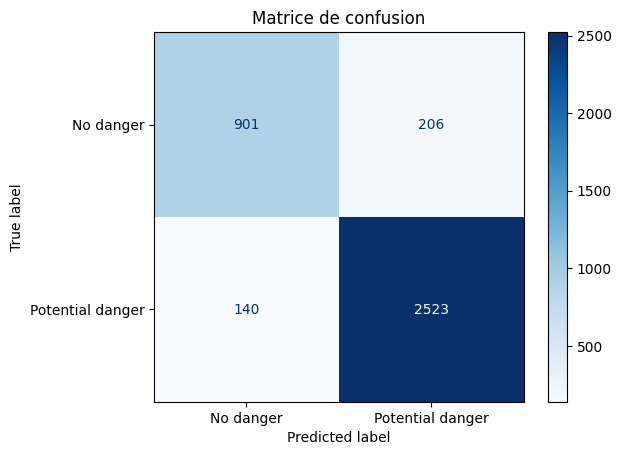

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédire sur les données de test
y_pred = model_lr.predict(X_test_selected)  # Si tu utilises un modèle LSTM ou un autre modèle
if hasattr(y_pred[0], "__len__"):  # Si le modèle donne des probabilités
    y_pred = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes binaires

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No danger", "Potential danger"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()


SVM

In [42]:
# Charger les données équilibrées
# X = balanced_df["new_title"]  # Caractéristiques (textes)
# y = balanced_df["label"]  # Labels (0 ou 1)

# # Diviser les données en jeux d'entraînement et de test
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convertir les textes en vecteurs numériques avec TF-IDF
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train_vec = vectorizer.fit_transform(X_train).toarray()
# X_test_vec = vectorizer.transform(X_test).toarray()


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialiser le modèle SVM
model_svm = SVC(kernel='linear', random_state=42)

# Entraîner le modèle
model_svm.fit(X_train_selected, y_train)

print("SVM entraîné avec succès !")

SVM entraîné avec succès !


In [46]:
# Faire des prédictions
y_pred = model_svm.predict(X_test_selected)

# Afficher les métriques
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")


Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1107
           1       0.92      0.95      0.94      2663

    accuracy                           0.91      3770
   macro avg       0.90      0.88      0.89      3770
weighted avg       0.91      0.91      0.91      3770

Précision du modèle : 0.91


In [47]:
# Exemple pour un SVM
joblib.dump(model_svm, "svm_model.pkl")

# Exemple de textes à prédire
new_texts = [
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple violent
        # Exemple non violent
]

# Transformer les textes
new_texts_vec =  vectorizer_selected.transform(new_texts)

# Prédire avec le modèle
predictions = model_svm.predict(new_texts_vec)

# Afficher les résultats
for text, pred in zip(new_texts, predictions):
    label = "Potential danger" if pred == 1 else "No danger"
    print(f"Texte : '{text}' -> Prédiction : {label}")


Texte : 'Feel like she is emotionally abuse.' -> Prédiction : Potential danger
Texte : 'Life is great those days' -> Prédiction : Potential danger
Texte : 'I am happy' -> Prédiction : No danger
Texte : 'I am in a safe relationship' -> Prédiction : Potential danger
Texte : 'My dad used to beat me after school' -> Prédiction : Potential danger


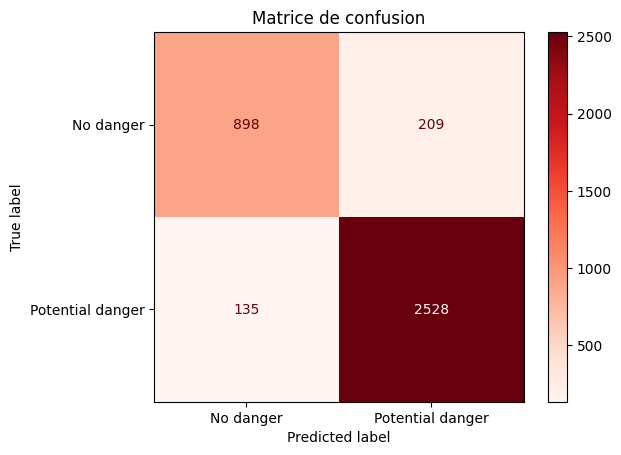

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédire sur les données de test
y_pred = model_svm.predict(X_test_selected)  # Si tu utilises un modèle LSTM ou un autre modèle
if hasattr(y_pred[0], "__len__"):  # Si le modèle donne des probabilités
    y_pred = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes binaires

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No danger", "Potential danger"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Matrice de confusion")
plt.show()


RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialiser le modèle Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
model_rf.fit(X_train_selected, y_train)

print("Random Forest entraîné avec succès !")

Random Forest entraîné avec succès !


In [51]:
# Faire des prédictions
y_pred = model_rf.predict(X_test_selected)

# Afficher les métriques
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")


Rapport de classification :
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1107
           1       0.96      0.97      0.97      2663

    accuracy                           0.96      3770
   macro avg       0.95      0.94      0.95      3770
weighted avg       0.96      0.96      0.96      3770

Précision du modèle : 0.96


In [52]:
# Exemple pour un SVM
joblib.dump(model_rf, "svm_model.pkl")

# Exemple de textes à prédire
new_texts = [
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple violent
        # Exemple non violent
]

# Transformer les nouveaux textes
new_texts_vec =  vectorizer_selected.transform(new_texts)

# Faire des prédictions
predictions = model_rf.predict(new_texts_vec)

# Afficher les résultats
for text, pred in zip(new_texts, predictions):
    label = "Potiental danger" if pred == 1 else "No danger"
    print(f"Texte : '{text}' -> Prédiction : {label}")


Texte : 'Feel like she is emotionally abuse.' -> Prédiction : Potiental danger
Texte : 'Life is great those days' -> Prédiction : Potiental danger
Texte : 'I am happy' -> Prédiction : No danger
Texte : 'I am in a safe relationship' -> Prédiction : Potiental danger
Texte : 'My dad used to beat me after school' -> Prédiction : Potiental danger


In [ ]:
#fin

XGBOOST

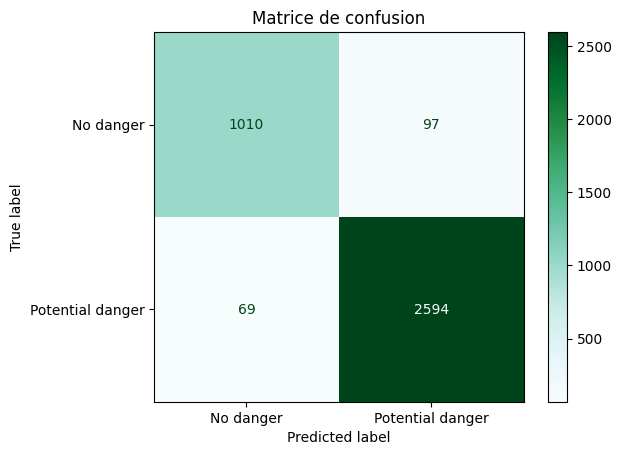

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédire sur les données de test
y_pred = model_rf.predict(X_test_selected)  # Si tu utilises un modèle LSTM ou un autre modèle
if hasattr(y_pred[0], "__len__"):  # Si le modèle donne des probabilités
    y_pred = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes binaires

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No danger", "Potential danger"])
disp.plot(cmap=plt.cm.BuGn)
plt.title("Matrice de confusion")
plt.show()



In [54]:
pip install xgboost

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialiser le modèle XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Entraîner le modèle
model_xgb.fit(X_train_selected, y_train)

print("XGBoost entraîné avec succès !")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost entraîné avec succès !


In [56]:
# Faire des prédictions
y_pred = model_xgb.predict(X_test_selected)

# Afficher les métriques
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

Rapport de classification :
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1107
           1       0.96      0.86      0.90      2663

    accuracy                           0.87      3770
   macro avg       0.84      0.88      0.85      3770
weighted avg       0.89      0.87      0.88      3770

Précision du modèle : 0.87


In [57]:
joblib.dump(model_xgb, "Xgboost_model.pkl")
# Exemple de textes à prédire
new_texts = [
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple violent
        # Exemple non violent
]

# Transformer les nouveaux textes
new_texts_vec =  vectorizer_selected.transform(new_texts)

# Faire des prédictions
predictions = model_xgb.predict(new_texts_vec)

# Afficher les résultats
for text, pred in zip(new_texts, predictions):
    label = "Potential danger" if pred == 1 else "No danger"
    print(f"Texte : '{text}' -> Prédiction : {label}")


Texte : 'Feel like she is emotionally abuse.' -> Prédiction : Potential danger
Texte : 'Life is great those days' -> Prédiction : Potential danger
Texte : 'I am happy' -> Prédiction : No danger
Texte : 'I am in a safe relationship' -> Prédiction : Potential danger
Texte : 'My dad used to beat me after school' -> Prédiction : Potential danger


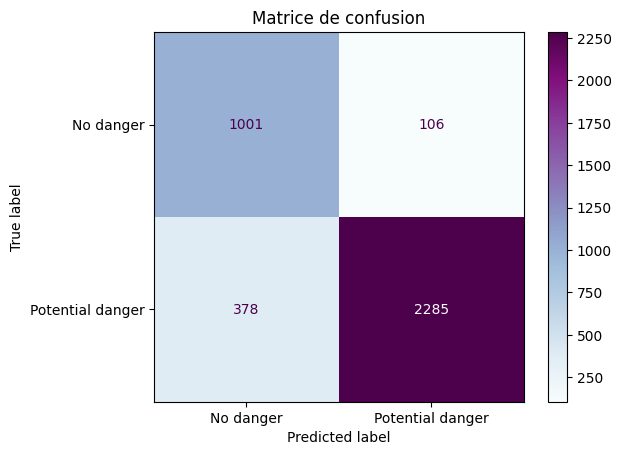

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédire sur les données de test
y_pred = model_xgb.predict(X_test_selected)  # Si tu utilises un modèle LSTM ou un autre modèle
if hasattr(y_pred[0], "__len__"):  # Si le modèle donne des probabilités
    y_pred = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes binaires

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No danger", "Potential danger"])
disp.plot(cmap=plt.cm.BuPu)
plt.title("Matrice de confusion")
plt.show()

KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialiser le modèle KNN
model_knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')  # n_neighbors = 5 est un bon point de départ

# Entraîner le modèle
model_knn.fit(X_train_selected, y_train)

print("KNN entraîné avec succès !")

KNN entraîné avec succès !


In [67]:
# Faire des prédictions
y_pred = model_knn.predict(X_test_selected)

# Afficher les métriques
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

Rapport de classification :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1107
           1       0.96      0.92      0.94      2663

    accuracy                           0.92      3770
   macro avg       0.90      0.92      0.90      3770
weighted avg       0.92      0.92      0.92      3770

Précision du modèle : 0.92


In [70]:
# Exemple de textes à prédire
new_texts = [
    "I see diomestic violence everday.",
    "Is it good to be beaten ",# Exemple violent
    "She enjoys spending time with friends",
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple non violent
]

# Transformer les nouveaux textes
new_texts_vec = vectorizer_selected.transform(new_texts)

# Faire des prédictions
predictions = model_knn.predict(new_texts_vec)

# Afficher les résultats
for text, pred in zip(new_texts, predictions):
    label = "Potential danger" if pred == 1 else "No danger"
    print(f"Texte : '{text}' -> Prédiction : {label}")

Texte : 'I see diomestic violence everday.' -> Prédiction : Potential danger
Texte : 'Is it good to be beaten ' -> Prédiction : Potential danger
Texte : 'She enjoys spending time with friends' -> Prédiction : No danger
Texte : 'Feel like she is emotionally abuse.' -> Prédiction : Potential danger
Texte : 'Life is great those days' -> Prédiction : Potential danger
Texte : 'I am happy' -> Prédiction : No danger
Texte : 'I am in a safe relationship' -> Prédiction : Potential danger
Texte : 'My dad used to beat me after school' -> Prédiction : Potential danger


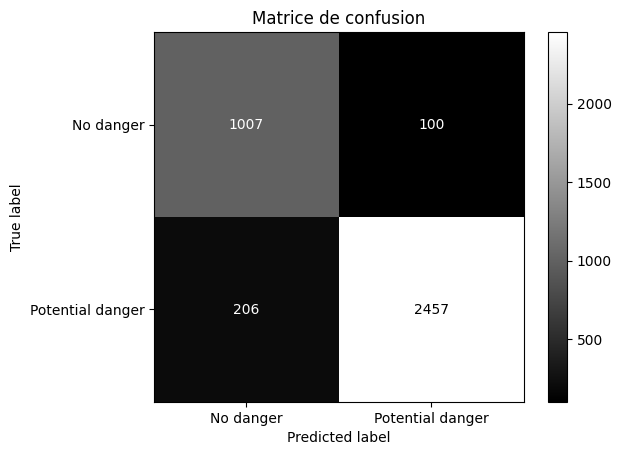

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédire sur les données de test
y_pred = model_knn.predict(X_test_selected)  # Si tu utilises un modèle LSTM ou un autre modèle
if hasattr(y_pred[0], "__len__"):  # Si le modèle donne des probabilités
    y_pred = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes binaires

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No danger", "Potential danger"])
disp.plot(cmap=plt.cm.gist_gray)
plt.title("Matrice de confusion")
plt.show()

#DECISION TREE

In [85]:
from sklearn.tree import DecisionTreeClassifier
# Initialiser le modèle Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle
model_dt.fit(X_train_selected, y_train)

print("Modèle Decision Tree entraîné avec succès !")

Modèle Decision Tree entraîné avec succès !


In [87]:
# Faire des prédictions
y_pred = model_dt.predict(X_test_selected)

# Afficher les métriques
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1107
           1       0.96      0.96      0.96      2663

    accuracy                           0.95      3770
   macro avg       0.93      0.94      0.93      3770
weighted avg       0.95      0.95      0.95      3770

Précision du modèle : 0.95


In [88]:
# Exemple de textes à prédire
new_texts = [
    "I see diomestic violence everday.",
    "Is it good to be beaten ",# Exemple violent
    "She enjoys spending time with friends",
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple non violent
]

# Transformer les nouveaux textes
new_texts_vec = vectorizer_selected.transform(new_texts)

# Faire des prédictions
predictions = model_dt.predict(new_texts_vec)

# Afficher les résultats
for text, pred in zip(new_texts, predictions):
    label = "Potential danger" if pred == 1 else "No danger"
    print(f"Texte : '{text}' -> Prédiction : {label}")

Texte : 'I see diomestic violence everday.' -> Prédiction : Potential danger
Texte : 'Is it good to be beaten ' -> Prédiction : Potential danger
Texte : 'She enjoys spending time with friends' -> Prédiction : No danger
Texte : 'Feel like she is emotionally abuse.' -> Prédiction : Potential danger
Texte : 'Life is great those days' -> Prédiction : Potential danger
Texte : 'I am happy' -> Prédiction : No danger
Texte : 'I am in a safe relationship' -> Prédiction : Potential danger
Texte : 'My dad used to beat me after school' -> Prédiction : Potential danger


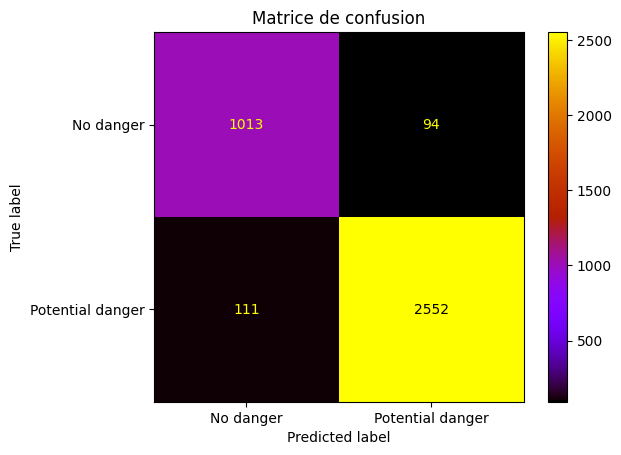

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédire sur les données de test
y_pred = model_dt.predict(X_test_selected)  # Si tu utilises un modèle LSTM ou un autre modèle
if hasattr(y_pred[0], "__len__"):  # Si le modèle donne des probabilités
    y_pred = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes binaires

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No danger", "Potential danger"])
disp.plot(cmap=plt.cm.gnuplot)
plt.title("Matrice de confusion")
plt.show()

#MLP

In [91]:
from sklearn.neural_network import MLPClassifier

# Initialiser le modèle Perceptron Multicouche
model_mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

# Entraîner le modèle
model_mlp.fit(X_train_selected, y_train)
print("Modèle MLP (Perceptron Multicouche) entraîné avec succès !")

Modèle MLP (Perceptron Multicouche) entraîné avec succès !


In [92]:
# Faire des prédictions
y_pred = model_mlp.predict(X_test_selected)

# Afficher les métriques
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1107
           1       0.96      0.97      0.97      2663

    accuracy                           0.95      3770
   macro avg       0.94      0.94      0.94      3770
weighted avg       0.95      0.95      0.95      3770

Précision du modèle : 0.95


In [93]:
# Exemple de textes à prédire
new_texts = [
    "I see diomestic violence everday.",
    "Is it good to be beaten ",# Exemple violent
    "She enjoys spending time with friends",
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple non violent
]

# Transformer les nouveaux textes
new_texts_vec = vectorizer_selected.transform(new_texts)

# Faire des prédictions
predictions = model_mlp.predict(new_texts_vec)

# Afficher les résultats
for text, pred in zip(new_texts, predictions):
    label = "Potential danger" if pred == 1 else "No danger"
    print(f"Texte : '{text}' -> Prédiction : {label}")

Texte : 'I see diomestic violence everday.' -> Prédiction : Potential danger
Texte : 'Is it good to be beaten ' -> Prédiction : Potential danger
Texte : 'She enjoys spending time with friends' -> Prédiction : Potential danger
Texte : 'Feel like she is emotionally abuse.' -> Prédiction : Potential danger
Texte : 'Life is great those days' -> Prédiction : Potential danger
Texte : 'I am happy' -> Prédiction : No danger
Texte : 'I am in a safe relationship' -> Prédiction : Potential danger
Texte : 'My dad used to beat me after school' -> Prédiction : Potential danger


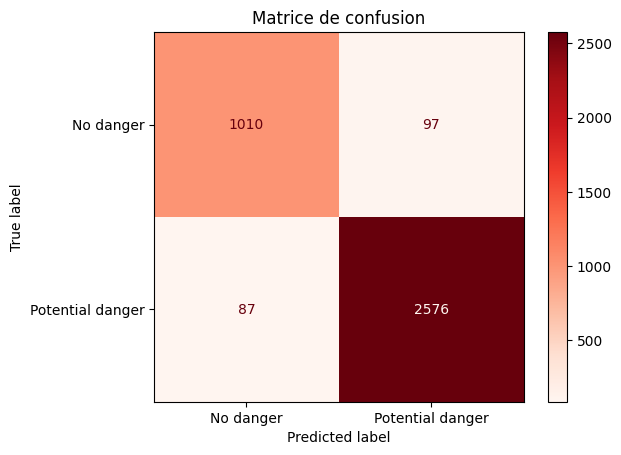

In [94]:
# Prédire sur les données de test
y_pred = model_mlp.predict(X_test_selected)  # Si tu utilises un modèle LSTM ou un autre modèle
if hasattr(y_pred[0], "__len__"):  # Si le modèle donne des probabilités
    y_pred = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes binaires

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No danger", "Potential danger"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Matrice de confusion")
plt.show()


LSTM

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Charger les textes et labels
X = balanced_df["new_title"].tolist()
y = balanced_df["label"].tolist()

# Tokeniser les textes
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

# Convertir les textes en séquences
X_sequences = tokenizer.texts_to_sequences(X)

# Padding pour obtenir des séquences de même longueur
X_padded = pad_sequences(X_sequences, maxlen=100, padding='post', truncating='post')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

import numpy as np

# Convertir les labels en tableaux Numpy
y_train = np.array(y_train)
y_test = np.array(y_test)


print(f"Taille des données d'entraînement : {len(X_train)}")
print(f"Taille des données de test : {len(X_test)}")


Taille des données d'entraînement : 15077
Taille des données de test : 3770


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Définir le modèle
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),  # Couche d'embedding
    LSTM(64, return_sequences=False),  # LSTM avec 64 unités
    Dropout(0.5),  # Dropout pour éviter le sur-ajustement
    Dense(64, activation='relu'),  # Couche entièrement connectée
    Dense(1, activation='sigmoid')  # Couche de sortie
])

# Compiler le modèle
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_lstm.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [76]:
# Entraîner le modèle
history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32
)

Epoch 1/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 47s 86ms/step - accuracy: 0.7046 - loss: 0.6174 - val_accuracy: 0.7064 - val_loss: 0.6054
Epoch 2/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.7049 - loss: 0.6096 - val_accuracy: 0.7064 - val_loss: 0.6079
Epoch 3/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.7030 - loss: 0.6109 - val_accuracy: 0.7064 - val_loss: 0.6058
Epoch 4/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.6975 - loss: 0.6143 - val_accuracy: 0.7064 - val_loss: 0.6062
Epoch 5/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.7016 - loss: 0.6101 - val_accuracy: 0.7064 - val_loss: 0.6054


In [77]:
# Évaluer le modèle
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"Précision : {accuracy:.2f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7051 - loss: 0.6066
Précision : 0.71


In [79]:
# Nouveaux textes
new_texts = [
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple violent
        # Exemple non violent
]

# Prétraiter les nouveaux textes
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded = pad_sequences(new_sequences, maxlen=100, padding='post', truncating='post')

# Faire des prédictions
predictions = model_lstm.predict(new_padded)

# Afficher les résultats
for text, pred in zip(new_texts, predictions):
    label = "Violent" if pred > 0.5 else "Non violent"
    print(f"Texte : '{text}' -> Prédiction : {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Texte : 'Feel like she is emotionally abuse.' -> Prédiction : Violent
Texte : 'Life is great those days' -> Prédiction : Violent
Texte : 'I am happy' -> Prédiction : Violent
Texte : 'I am in a safe relationship' -> Prédiction : Violent
Texte : 'My dad used to beat me after school' -> Prédiction : Violent


In [ ]:
# fin

BERT

In [ ]:
pip install transformers torch

In [80]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import torch

# Charger les données équilibrées
X = balanced_df["new_title"].tolist()
y = balanced_df["label"].tolist()

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Charger le tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokeniser les textes
def tokenize_texts(texts, labels, max_length=128):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    labels = torch.tensor(labels)
    return inputs, labels

train_inputs, train_labels = tokenize_texts(X_train, y_train)
test_inputs, test_labels = tokenize_texts(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [81]:
from transformers import BertForSequenceClassification

# Charger le modèle BERT pour une tâche de classification binaire
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [82]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Préparer les datasets pour DataLoader
train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

# Créer les DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Optimiseur
optimizer = AdamW(model.parameters(), lr=5e-5)

# Déplacer le modèle sur GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [84]:
from torch.nn import CrossEntropyLoss

# Fonction d'entraînement
def train(model, train_loader, optimizer, device):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        # Réinitialiser les gradients
        optimizer.zero_grad()

        # Faire une passe avant
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Rétropropagation
        loss.backward()
        optimizer.step()

    return total_loss / len(train_loader)

# Boucle d'entraînement
epochs = 10
for epoch in range(epochs):
    train_loss = train(model, train_loader, optimizer, device)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}")


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

def evaluate(model, test_loader, device):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return preds, true_labels

# Faire l'évaluation
predictions, true_labels = evaluate(model, test_loader, device)

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(true_labels, predictions))

In [ ]:
# Nouveaux textes
new_texts = [
    "I see diomestic violence everday.",
    "Is it good to be beaten ",# Exemple violent
    "She enjoys spending time with friends",
    "Feel like she is emotionally abuse.",
    "Life is great those days",
    "I am happy",
    "I am in a safe relationship",
    "My dad used to beat me after school",# Exemple non violent
]

# Tokeniser les nouveaux textes
new_inputs = tokenizer(new_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
new_inputs = {key: value.to(device) for key, value in new_inputs.items()}

# Faire des prédictions
model.eval()
with torch.no_grad():
    outputs = model(**new_inputs)
    predictions = torch.argmax(outputs.logits, axis=1)

# Afficher les résultats
for text, pred in zip(new_texts, predictions.cpu().numpy()):
    label = "Violent" if pred == 1 else "Non violent"
    print(f"Texte : '{text}' -> Prédiction : {label}")
